In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.animation as animation
import datetime
import seaborn as sns
import missingno as msno
import firebase_admin
import pygwalker as pyg
from firebase_admin import credentials, db
from datetime import datetime  # Untuk konversi timestamp ke human-readable
sns.set_theme(style="whitegrid")
%matplotlib inline 

In [2]:
# Konfigurasi database sumber
source_cred = credentials.Certificate("/work/staklimjerukagung-firebase-admin.json")
firebase_admin.initialize_app(source_cred, {
    'databaseURL': 'https://staklimjerukagung-default-rtdb.asia-southeast1.firebasedatabase.app/'
})

In [3]:
# Input readable date
start_readable_date = "01-08-2025 00:00:00"  # Format: DD-MM-YYYY HH:MM:SS
end_readable_date = "31-08-2025 23:59:59"  # Format: DD-MM-YYYY HH:MM:SS

# Convert readable date to Unix timestamp
start_timestamp = int(datetime.strptime(start_readable_date, "%d-%m-%Y %H:%M:%S").timestamp())
print(start_timestamp) # Convert to string and print
end_timestamp = int(datetime.strptime(end_readable_date, "%d-%m-%Y %H:%M:%S").timestamp())
print(end_timestamp) # Convert to string and print


1754020800
1756699199


In [4]:
# Refer ke path data
ref_data1 = db.reference('/auto_weather_stat/id-03/data')
ref_data2 = db.reference('/auto_weather_stat/id-05/data')

# Ambil data yang key-nya berada dalam rentang waktu yang ditentukan
query_data1 = ref_data1.order_by_key().start_at(str(start_timestamp)).end_at(str(end_timestamp))
query_data2 = ref_data2.order_by_key().start_at(str(start_timestamp)).end_at(str(end_timestamp))

# Ambil hasil
results_data1 = query_data1.get()
results_data2 = query_data2.get()

In [5]:
# Mengubah data menjadi DataFrame pandas untuk data pertama
if results_data1:
    cuaca1 = pd.DataFrame.from_dict(results_data1, orient='index')
    
    # Jika 'timestamp' sudah ada, jangan pindahkan indeks ke kolom
    if 'timestamp' not in cuaca1.columns:
        cuaca1.index.name = 'timestamp'  # Mengatur nama indeks
        cuaca1.reset_index(inplace=True)  # Memindahkan indeks menjadi kolom biasa
    
    print("Data dari sumber pertama:")
    print(cuaca1.head())  # Menampilkan data untuk verifikasi
else:
    print("Tidak ada data dari sumber pertama")

# Mengubah data menjadi DataFrame pandas untuk data kedua
if results_data2:
    cuaca2 = pd.DataFrame.from_dict(results_data2, orient='index')
    
    # Jika 'timestamp' sudah ada, jangan pindahkan indeks ke kolom
    if 'timestamp' not in cuaca2.columns:
        cuaca2.index.name = 'timestamp'  # Mengatur nama indeks
        cuaca2.reset_index(inplace=True)  # Memindahkan indeks menjadi kolom biasa
    
    print("Data dari sumber kedua:")
    print(cuaca2.head())  # Menampilkan data untuk verifikasi
else:
    print("Tidak ada data dari sumber kedua")

Data dari sumber pertama:
                 dew  humidity  pressure  temperature   timestamp  volt  \
1754020818  26.44569     78.29   1010.58        30.66  1754020818  4.14   
1754020878  26.45971     78.31   1010.60        30.67  1754020878  4.14   
1754020938  26.34315     77.64   1010.61        30.70  1754020938  4.14   
1754020998  26.11488     77.26   1010.62        30.55  1754020998  4.14   
1754021058  26.23263     77.40   1010.52        30.64  1754021058  4.14   

            rainfall  rainrate  
1754020818       NaN       NaN  
1754020878       NaN       NaN  
1754020938       NaN       NaN  
1754020998       NaN       NaN  
1754021058       NaN       NaN  
Data dari sumber kedua:
                 dew  humidity  pressure  rainfall  rainrate  temperature  \
1754020813  26.16128  79.27886   1010.44       0.0       0.0     30.15907   
1754020873  26.26243  79.70420   1010.39       0.0       0.0     30.16975   
1754020933  25.95957  78.19737   1010.36       0.0       0.0     30.19

In [6]:
cuaca1.tail(10)

,dew,humidity,pressure,temperature,timestamp,volt,rainfall,rainrate
1756179547,24.86487,69.91,1014.85,31.00,1756179547,4.14,NaN,NaN
1756179607,24.91001,69.70,1014.82,31.10,1756179607,4.14,NaN,NaN
1756179667,24.90226,69.43,1014.80,31.16,1756179667,4.14,NaN,NaN
1756179727,24.82888,68.93,1014.85,31.21,1756179727,4.15,NaN,NaN
1756179787,24.95635,69.18,1014.81,31.28,1756179787,4.14,NaN,NaN
1756179847,24.71060,68.64,1014.79,31.16,1756179847,4.14,NaN,NaN
1756179907,24.64163,68.67,1014.75,31.08,1756179907,4.14,NaN,NaN
1756179967,24.69550,68.50,1014.78,31.18,1756179967,4.15,NaN,NaN
1756180027,24.87133,68.83,1014.76,31.28,1756180027,4.14,NaN,NaN
1756180087,24.99310,68.86,1014.74,31.40,1756180087,4.14,NaN,NaN


In [7]:
cuaca1['timestamp']= cuaca1['timestamp'].astype(int)
cuaca2['timestamp']= cuaca2['timestamp'].astype(int)
cuaca1.tail(10)

,dew,humidity,pressure,temperature,timestamp,volt,rainfall,rainrate
1756179547,24.86487,69.91,1014.85,31.00,1756179547,4.14,NaN,NaN
1756179607,24.91001,69.70,1014.82,31.10,1756179607,4.14,NaN,NaN
1756179667,24.90226,69.43,1014.80,31.16,1756179667,4.14,NaN,NaN
1756179727,24.82888,68.93,1014.85,31.21,1756179727,4.15,NaN,NaN
1756179787,24.95635,69.18,1014.81,31.28,1756179787,4.14,NaN,NaN
1756179847,24.71060,68.64,1014.79,31.16,1756179847,4.14,NaN,NaN
1756179907,24.64163,68.67,1014.75,31.08,1756179907,4.14,NaN,NaN
1756179967,24.69550,68.50,1014.78,31.18,1756179967,4.15,NaN,NaN
1756180027,24.87133,68.83,1014.76,31.28,1756180027,4.14,NaN,NaN
1756180087,24.99310,68.86,1014.74,31.40,1756180087,4.14,NaN,NaN


In [8]:
# Konversi timestamp ke datetime dalam format UTC
cuaca1['timestamp'] = pd.to_datetime(cuaca1['timestamp'], unit='s', utc=True)
cuaca2['timestamp'] = pd.to_datetime(cuaca2['timestamp'], unit='s', utc=True)

# Mengonversi ke zona waktu WIB (Asia/Jakarta)
cuaca1['timestamp'] = cuaca1['timestamp'].dt.tz_convert('Asia/Jakarta')
cuaca2['timestamp'] = cuaca2['timestamp'].dt.tz_convert('Asia/Jakarta')

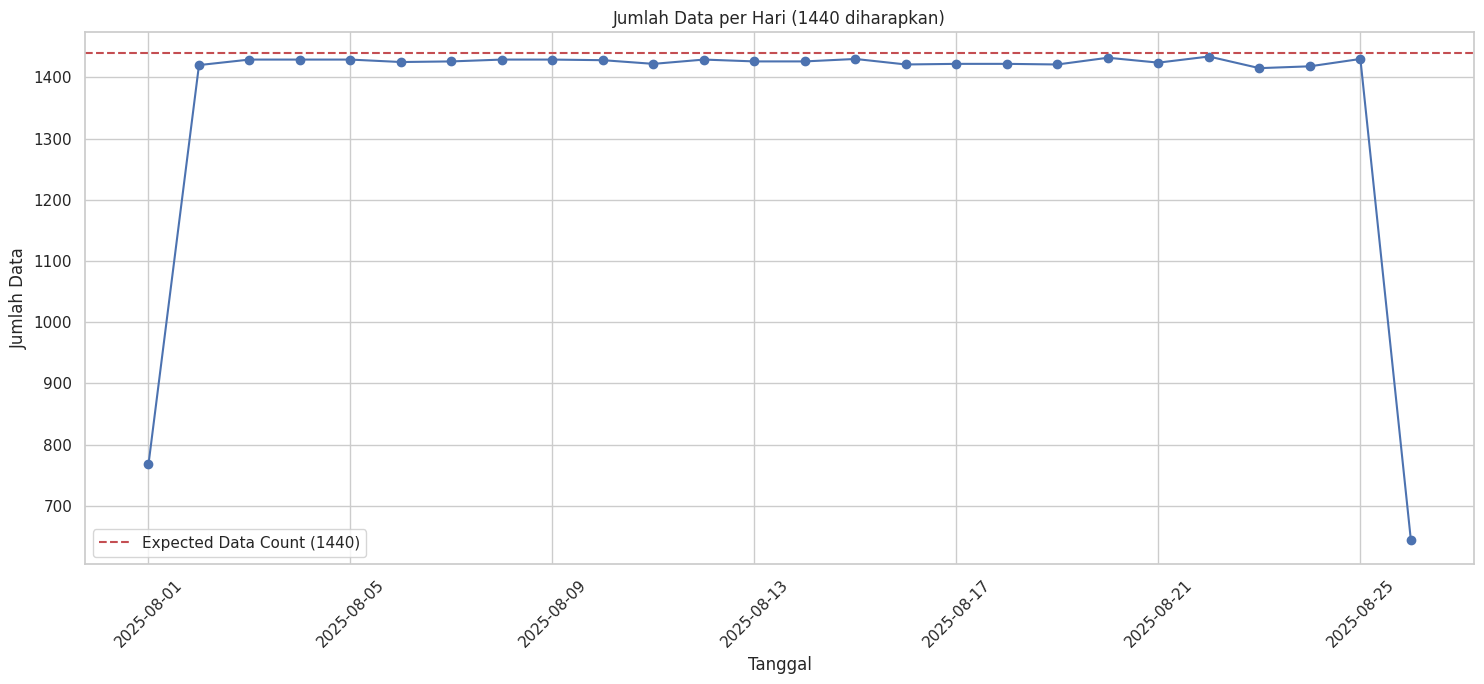

Hari dengan jumlah data yang kurang dari 1440:
          date  count
0   2025-08-01    768
1   2025-08-02   1420
2   2025-08-03   1429
3   2025-08-04   1429
4   2025-08-05   1429
5   2025-08-06   1425
6   2025-08-07   1426
7   2025-08-08   1429
8   2025-08-09   1429
9   2025-08-10   1428
10  2025-08-11   1422
11  2025-08-12   1429
12  2025-08-13   1426
13  2025-08-14   1426
14  2025-08-15   1430
15  2025-08-16   1421
16  2025-08-17   1422
17  2025-08-18   1422
18  2025-08-19   1421
19  2025-08-20   1432
20  2025-08-21   1424
21  2025-08-22   1434
22  2025-08-23   1415
23  2025-08-24   1418
24  2025-08-25   1430
25  2025-08-26    644


In [9]:
# Mengelompokkan data berdasarkan hari
cuaca1['date'] = cuaca1['timestamp'].dt.date
data_per_day = cuaca1.groupby('date').size().reset_index(name='count')

# Visualisasi jumlah data per hari
plt.figure(figsize=(15, 7))
plt.plot(data_per_day['date'], data_per_day['count'], marker='o', linestyle='-')
plt.axhline(y=1440, color='r', linestyle='--', label='Expected Data Count (1440)')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data per Hari (1440 diharapkan)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Menampilkan hari-hari yang tidak memenuhi 1440 data
days_with_missing_data = data_per_day[data_per_day['count'] != 1440]
print("Hari dengan jumlah data yang kurang dari 1440:")
print(days_with_missing_data)

In [10]:
cuaca1.dtypes

dew                                 float64
humidity                            float64
pressure                            float64
temperature                         float64
timestamp      datetime64[ns, Asia/Jakarta]
volt                                float64
rainfall                            float64
rainrate                            float64
date                                 object
dtype: object

In [11]:
cuaca2.dtypes

dew                                 float64
humidity                            float64
pressure                            float64
rainfall                            float64
rainrate                            float64
temperature                         float64
timestamp      datetime64[ns, Asia/Jakarta]
volt                                float64
dtype: object

In [12]:
cuaca1.head(10)

,dew,humidity,pressure,temperature,timestamp,volt,rainfall,rainrate,date
1754020818,26.44569,78.29,1010.58,30.66,2025-08-01 11:00:18+07:00,4.14,NaN,NaN,2025-08-01
1754020878,26.45971,78.31,1010.60,30.67,2025-08-01 11:01:18+07:00,4.14,NaN,NaN,2025-08-01
1754020938,26.34315,77.64,1010.61,30.70,2025-08-01 11:02:18+07:00,4.14,NaN,NaN,2025-08-01
1754020998,26.11488,77.26,1010.62,30.55,2025-08-01 11:03:18+07:00,4.14,NaN,NaN,2025-08-01
1754021058,26.23263,77.40,1010.52,30.64,2025-08-01 11:04:18+07:00,4.14,NaN,NaN,2025-08-01
1754021118,26.33600,77.43,1010.61,30.74,2025-08-01 11:05:18+07:00,4.14,NaN,NaN,2025-08-01
1754021178,26.20290,77.22,1010.50,30.65,2025-08-01 11:06:18+07:00,4.14,NaN,NaN,2025-08-01
1754021238,26.17606,77.23,1010.48,30.62,2025-08-01 11:07:18+07:00,4.14,NaN,NaN,2025-08-01
1754021298,26.13769,77.32,1010.44,30.56,2025-08-01 11:08:18+07:00,4.14,NaN,NaN,2025-08-01
1754021358,26.37052,77.81,1010.52,30.69,2025-08-01 11:09:18+07:00,4.13,NaN,NaN,2025-08-01


In [13]:
datacuaca = cuaca1
datacuaca2 = cuaca2

In [14]:
walker = pyg.walk(datacuaca)
walker

Box(children=(HTML(value='\n<div id="ifr-pyg-00063d3c8b79d8b0mXkLeMjdx3AIt7vc" style="height: auto">\n    <hea…

Visualisasi missing values untuk datacuaca:


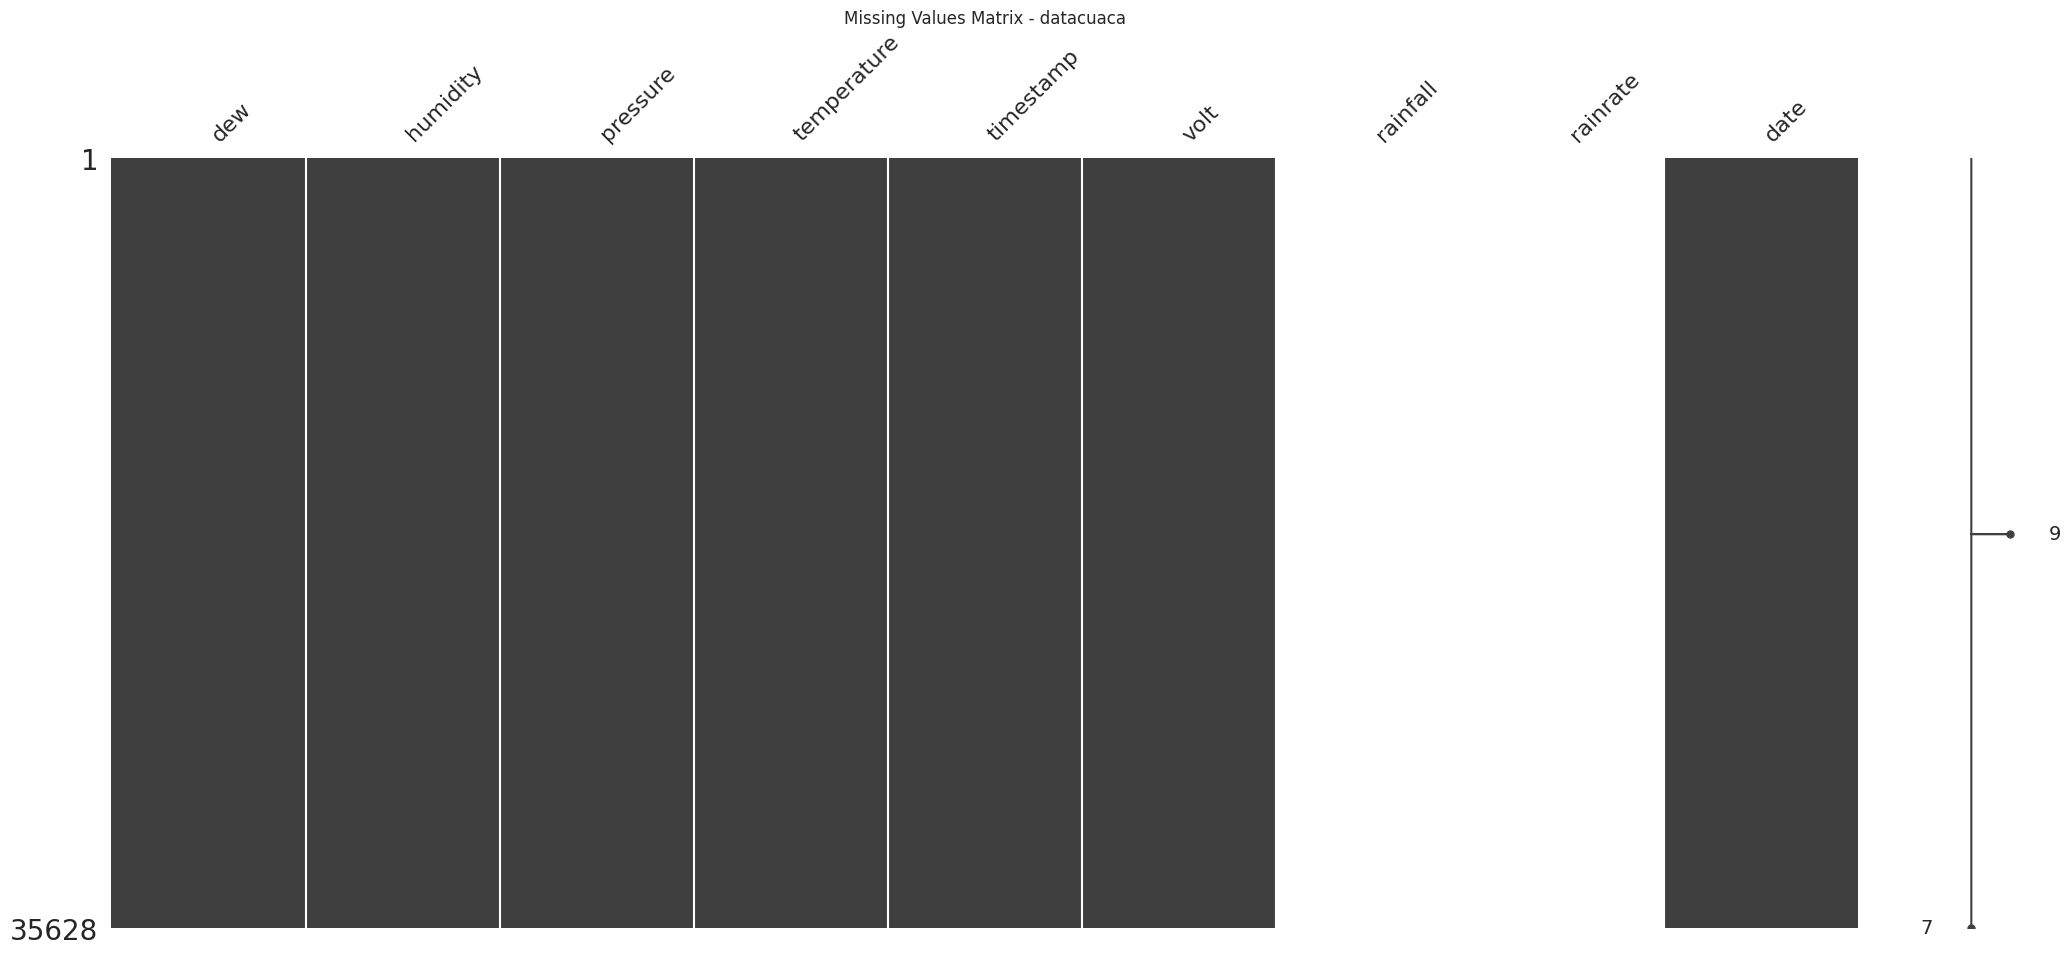

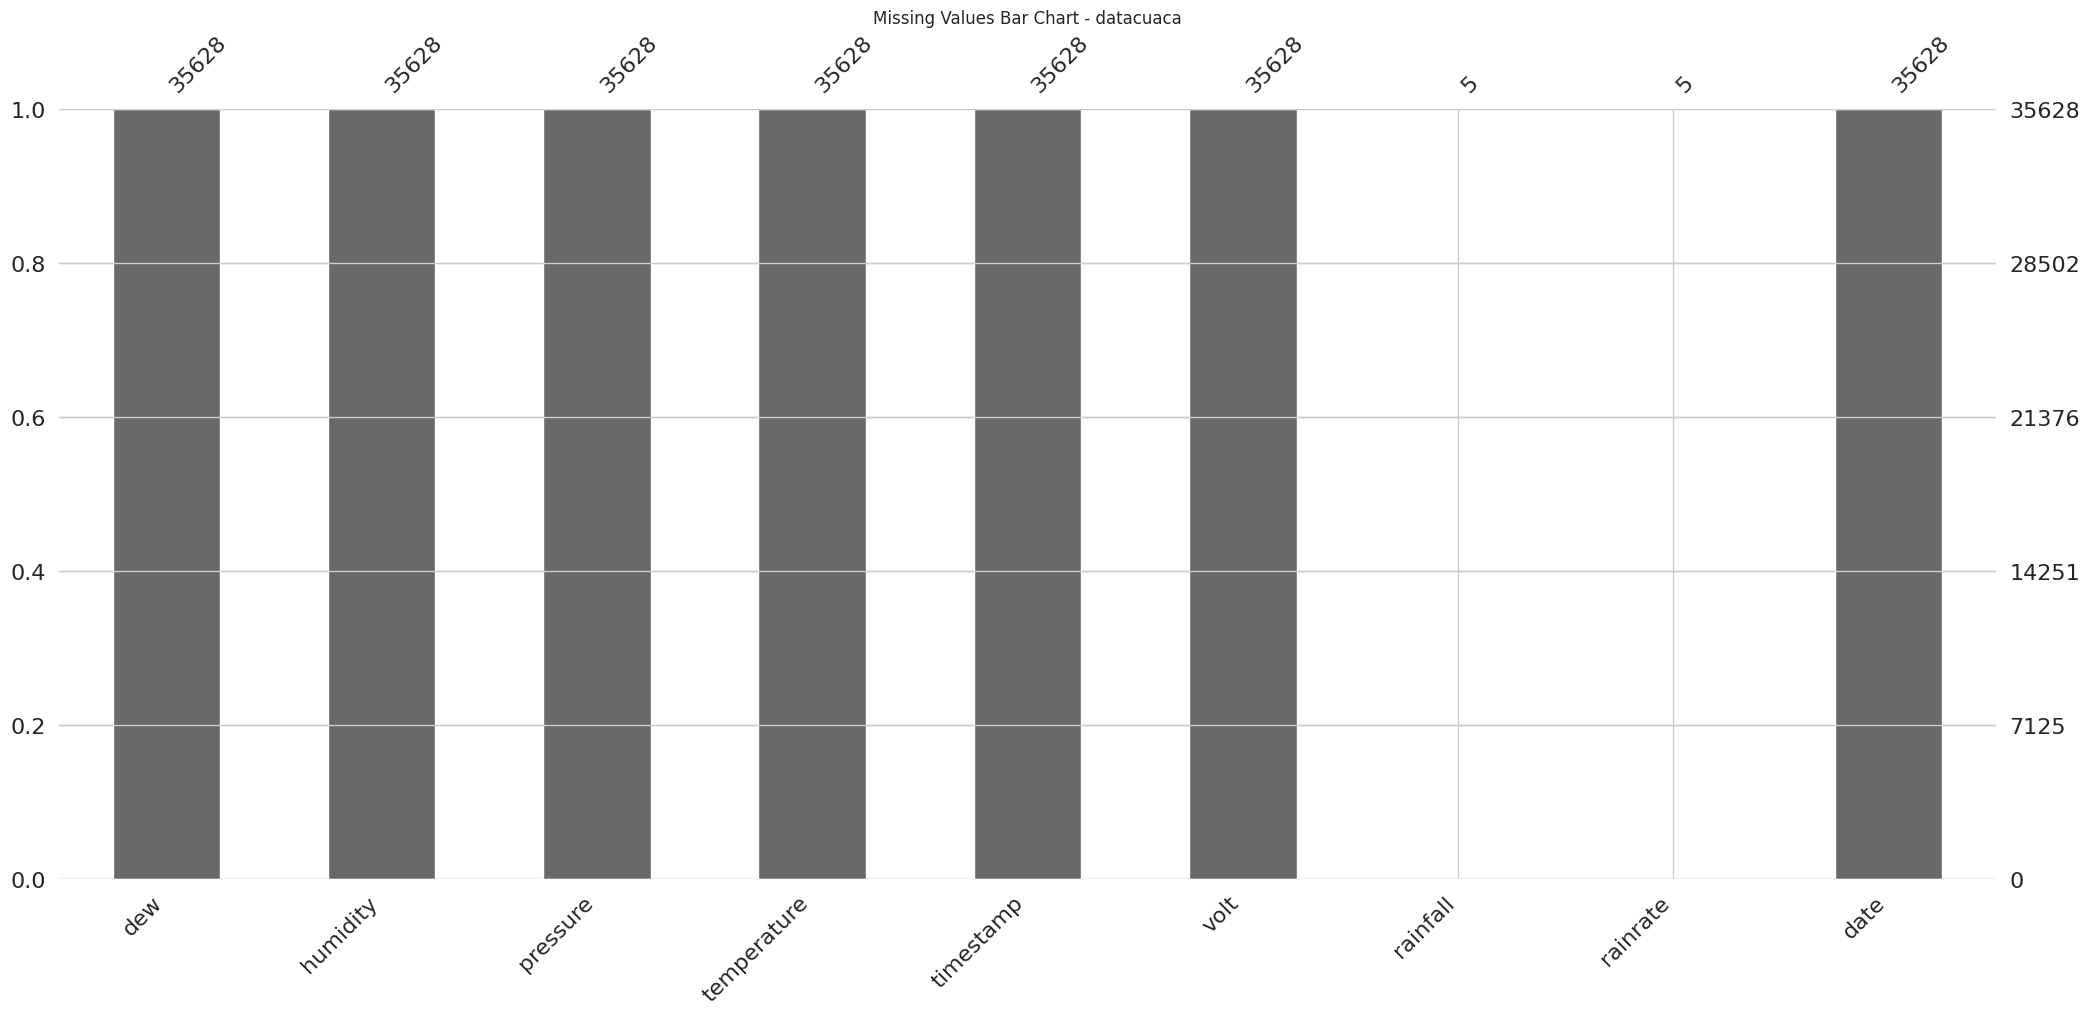

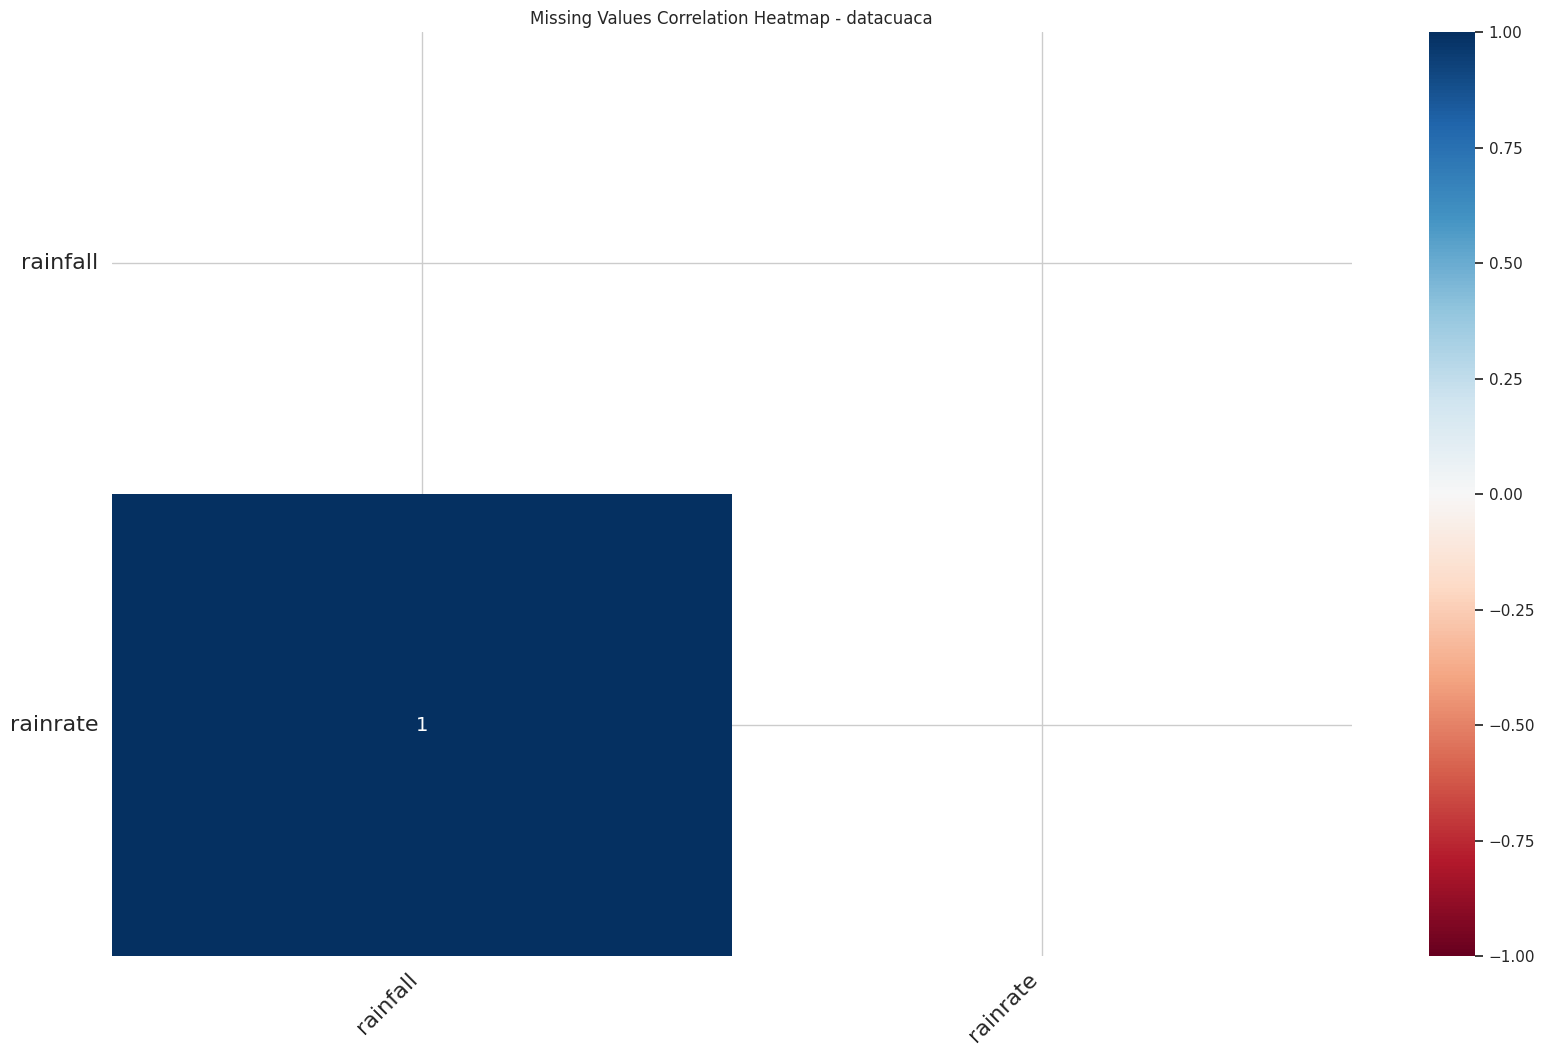

Visualisasi missing values untuk datacuaca2:


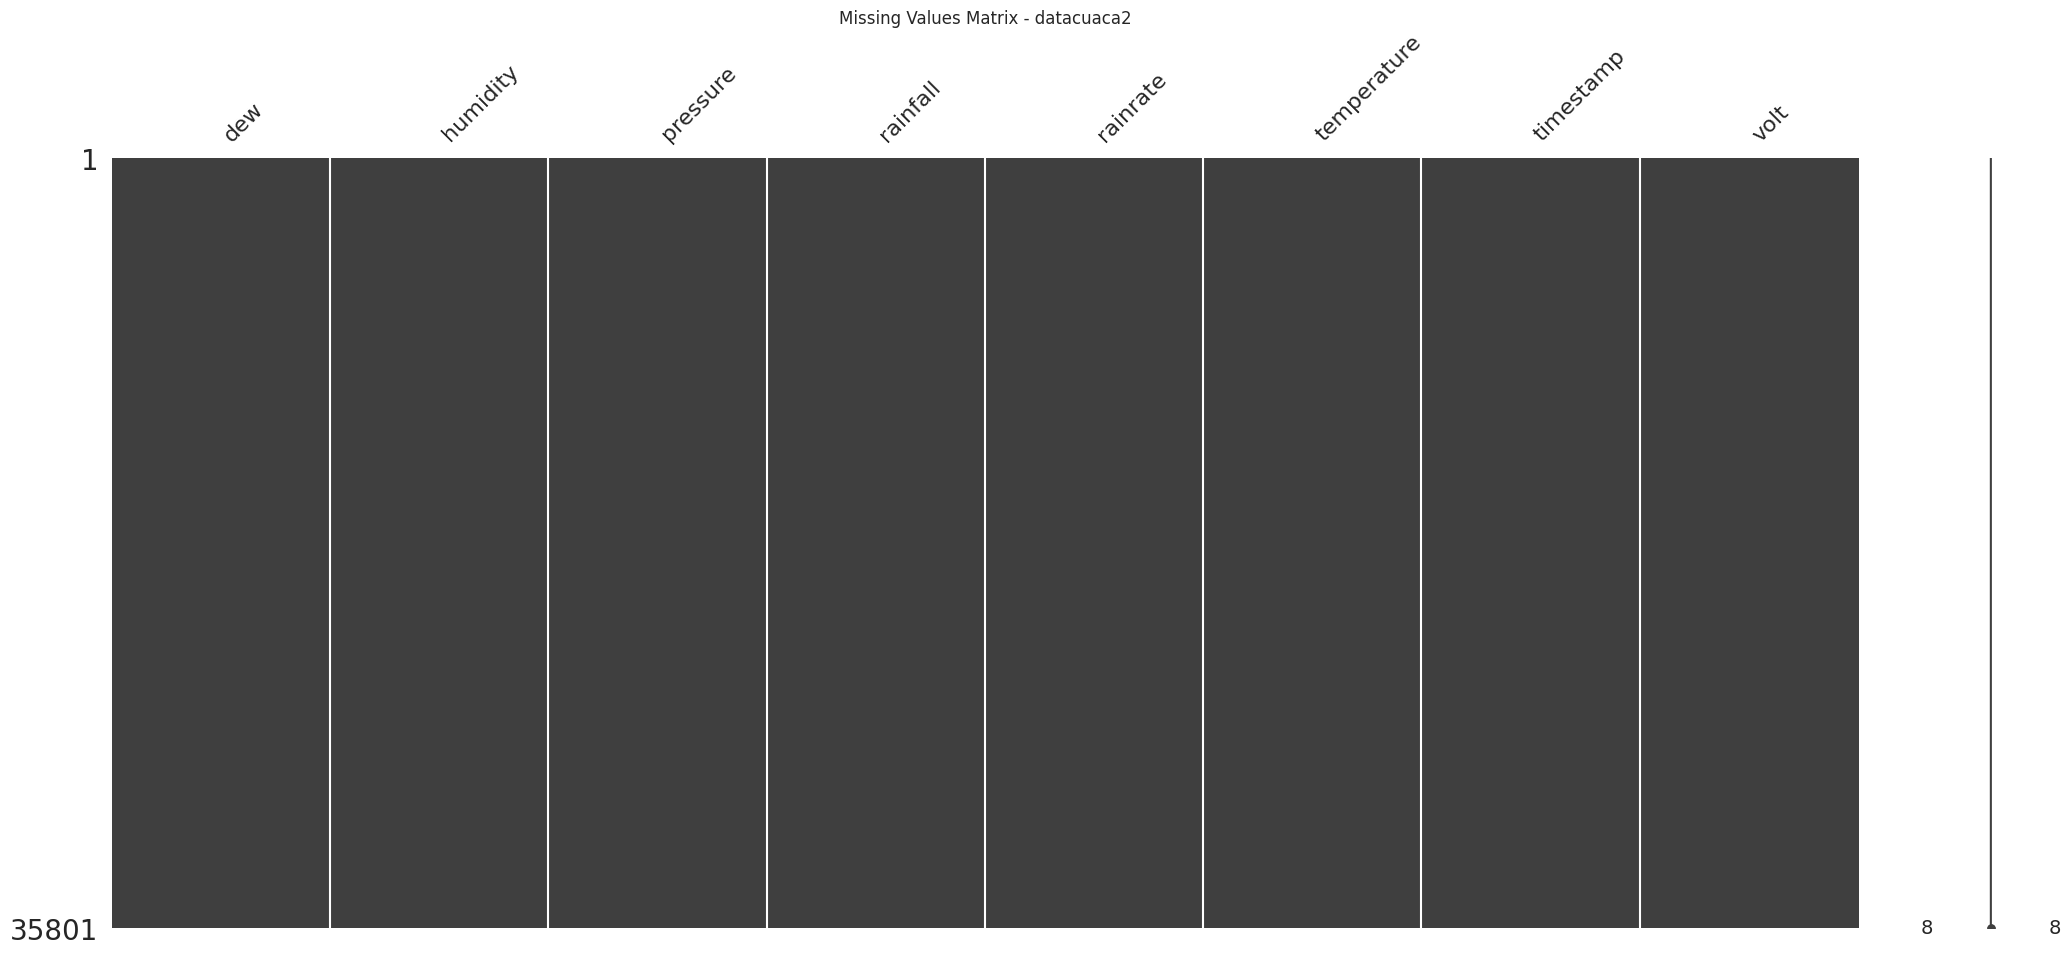

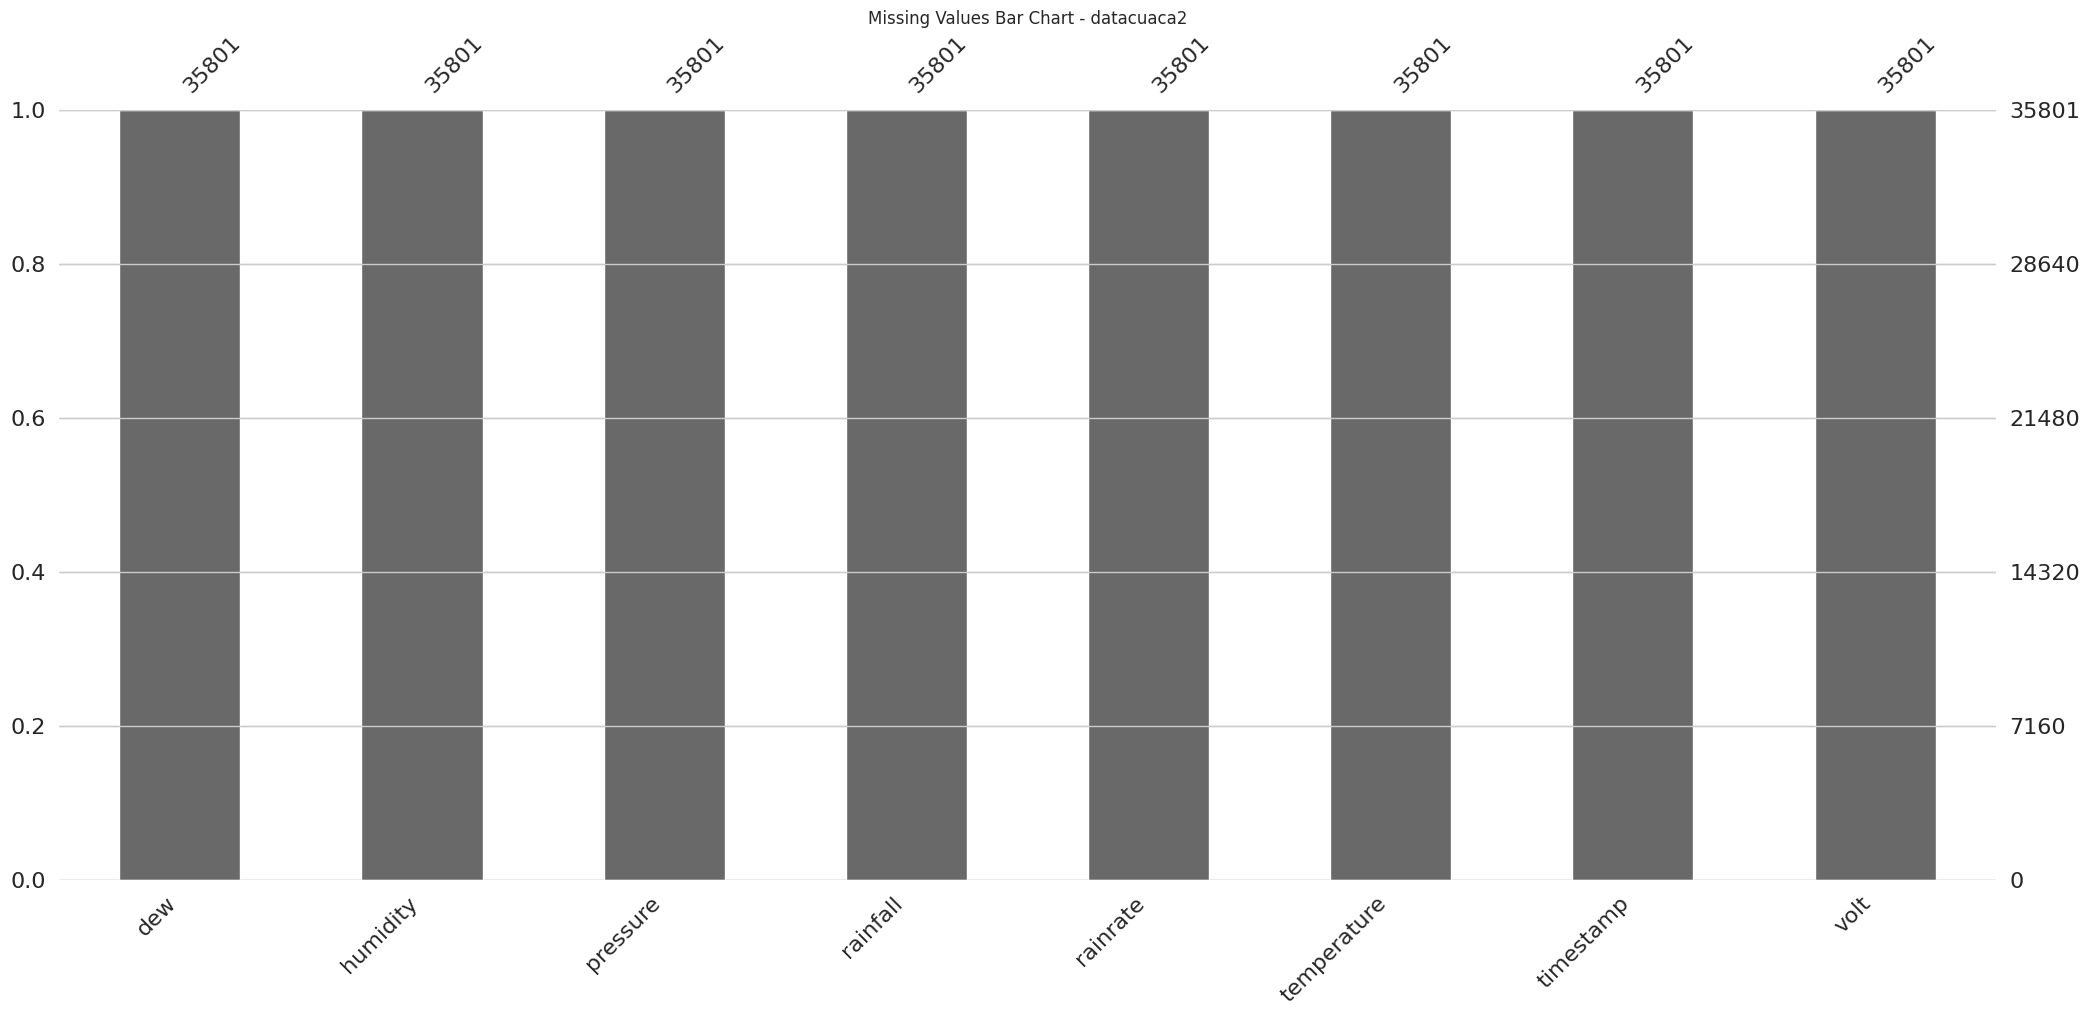

/root/venv/lib/python3.10/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/root/venv/lib/python3.10/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


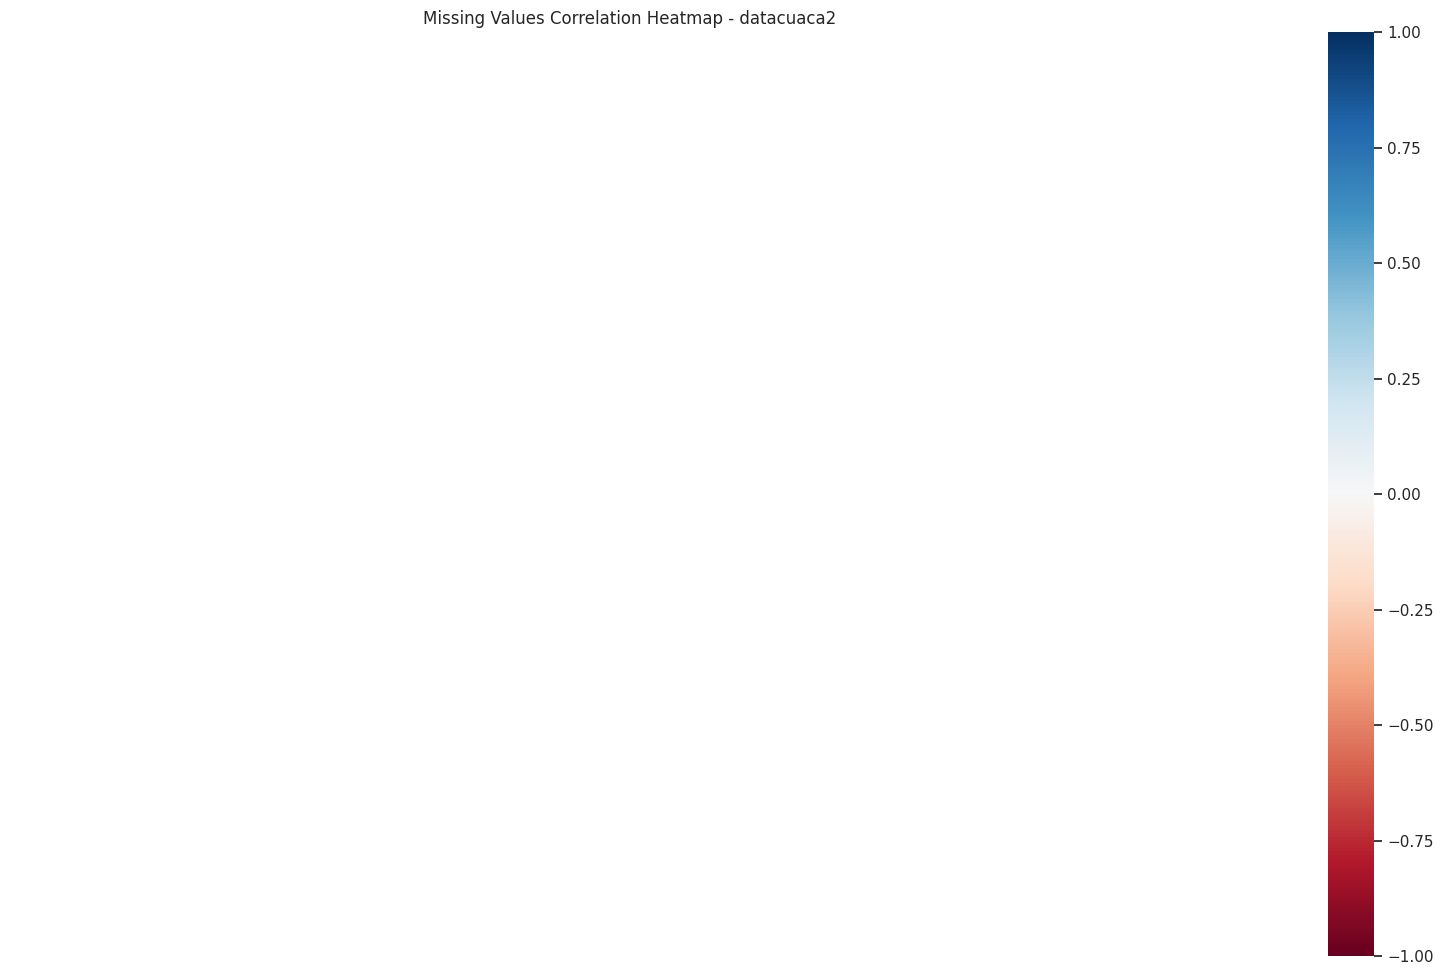

Ringkasan missing values untuk datacuaca:
dew                0
humidity           0
pressure           0
temperature        0
timestamp          0
volt               0
rainfall       35623
rainrate       35623
date               0
dtype: int64

Ringkasan missing values untuk datacuaca2:
dew            0
humidity       0
pressure       0
rainfall       0
rainrate       0
temperature    0
timestamp      0
volt           0
dtype: int64


In [15]:
# Visualisasi missing values untuk datacuaca
print("Visualisasi missing values untuk datacuaca:")
msno.matrix(datacuaca)
plt.title("Missing Values Matrix - datacuaca")
plt.show()

msno.bar(datacuaca)
plt.title("Missing Values Bar Chart - datacuaca")
plt.show()

msno.heatmap(datacuaca)
plt.title("Missing Values Correlation Heatmap - datacuaca")
plt.show()

# Visualisasi missing values untuk datacuaca2
print("Visualisasi missing values untuk datacuaca2:")
msno.matrix(datacuaca2)
plt.title("Missing Values Matrix - datacuaca2")
plt.show()

msno.bar(datacuaca2)
plt.title("Missing Values Bar Chart - datacuaca2")
plt.show()

msno.heatmap(datacuaca2)
plt.title("Missing Values Correlation Heatmap - datacuaca2")
plt.show()

# Menampilkan ringkasan missing values
print("Ringkasan missing values untuk datacuaca:")
print(datacuaca.isnull().sum())

print("\nRingkasan missing values untuk datacuaca2:")
print(datacuaca2.isnull().sum())

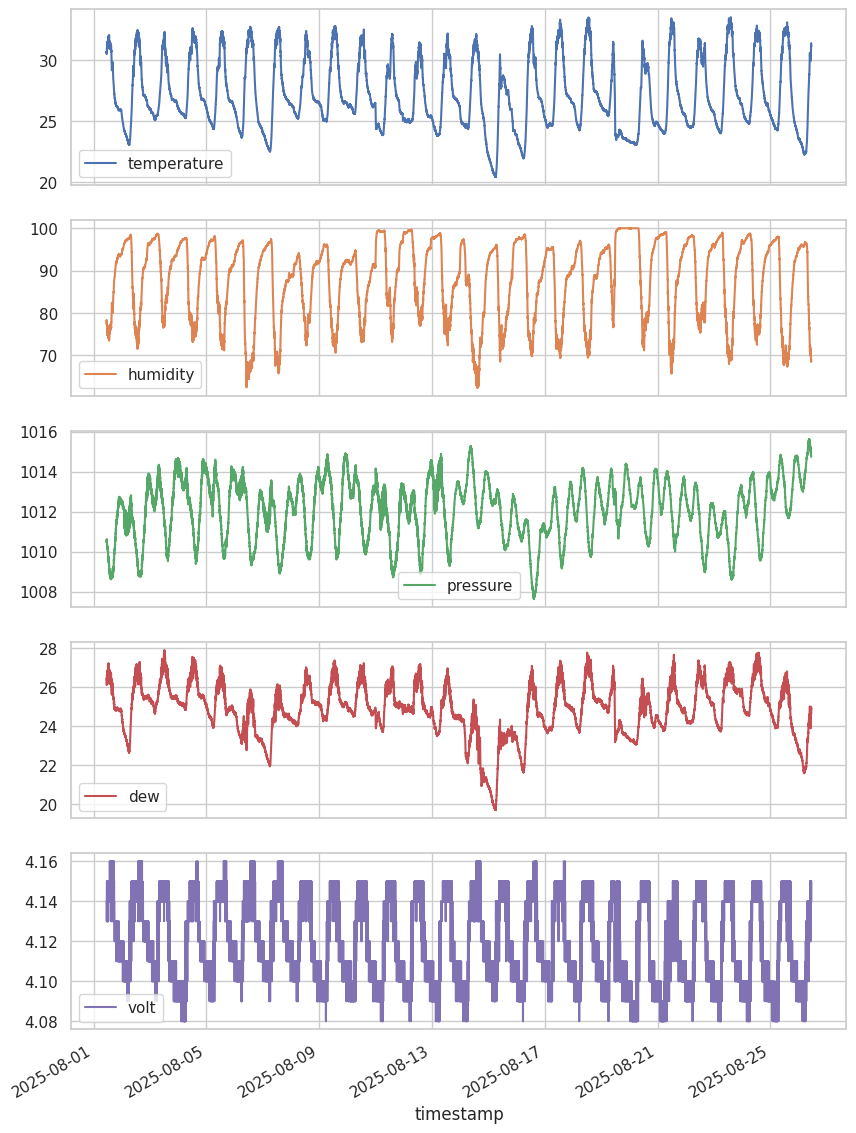

In [16]:
datacuaca.plot(
    y=[
    'temperature', 
    'humidity', 
    'pressure', 
    'dew',
    #'rainrate',
    #'rainfall',
    'volt'
    ],
    x='timestamp',
    subplots=True, figsize=(10, 15))
plt.show()

In [17]:
# Mengubah kolom 'timestamp' menjadi datetime
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Mengurutkan data berdasarkan 'timestamp'
datacuaca = datacuaca.sort_values(by='timestamp')

# Menambahkan kolom 'hour', 'minute', 'day', 'month', dan 'year' dari 'timestamp'
datacuaca['hour'] = datacuaca['timestamp'].dt.hour
datacuaca['minute'] = datacuaca['timestamp'].dt.minute
datacuaca['day'] = datacuaca['timestamp'].dt.day
datacuaca['week'] = datacuaca['timestamp'].dt.isocalendar().week
datacuaca['month'] = datacuaca['timestamp'].dt.month
datacuaca['year'] = datacuaca['timestamp'].dt.year

In [18]:
# Mengubah kolom 'timestamp' menjadi datetime
datacuaca2['timestamp'] = pd.to_datetime(datacuaca2['timestamp'])

# Mengurutkan data berdasarkan 'timestamp'
datacuaca2 = datacuaca2.sort_values(by='timestamp')

# Menambahkan kolom 'hour', 'minute', 'day', 'month', dan 'year' dari 'timestamp'
datacuaca2['hour'] = datacuaca2['timestamp'].dt.hour
datacuaca2['minute'] = datacuaca2['timestamp'].dt.minute
datacuaca2['day'] = datacuaca2['timestamp'].dt.day
datacuaca2['week'] = datacuaca2['timestamp'].dt.isocalendar().week
datacuaca2['month'] = datacuaca2['timestamp'].dt.month
datacuaca2['year'] = datacuaca2['timestamp'].dt.year

In [19]:
pilih_tahun = 2025
pilih_bulan = 5

ValueError: zero-size array to reduction operation fmin which has no identity

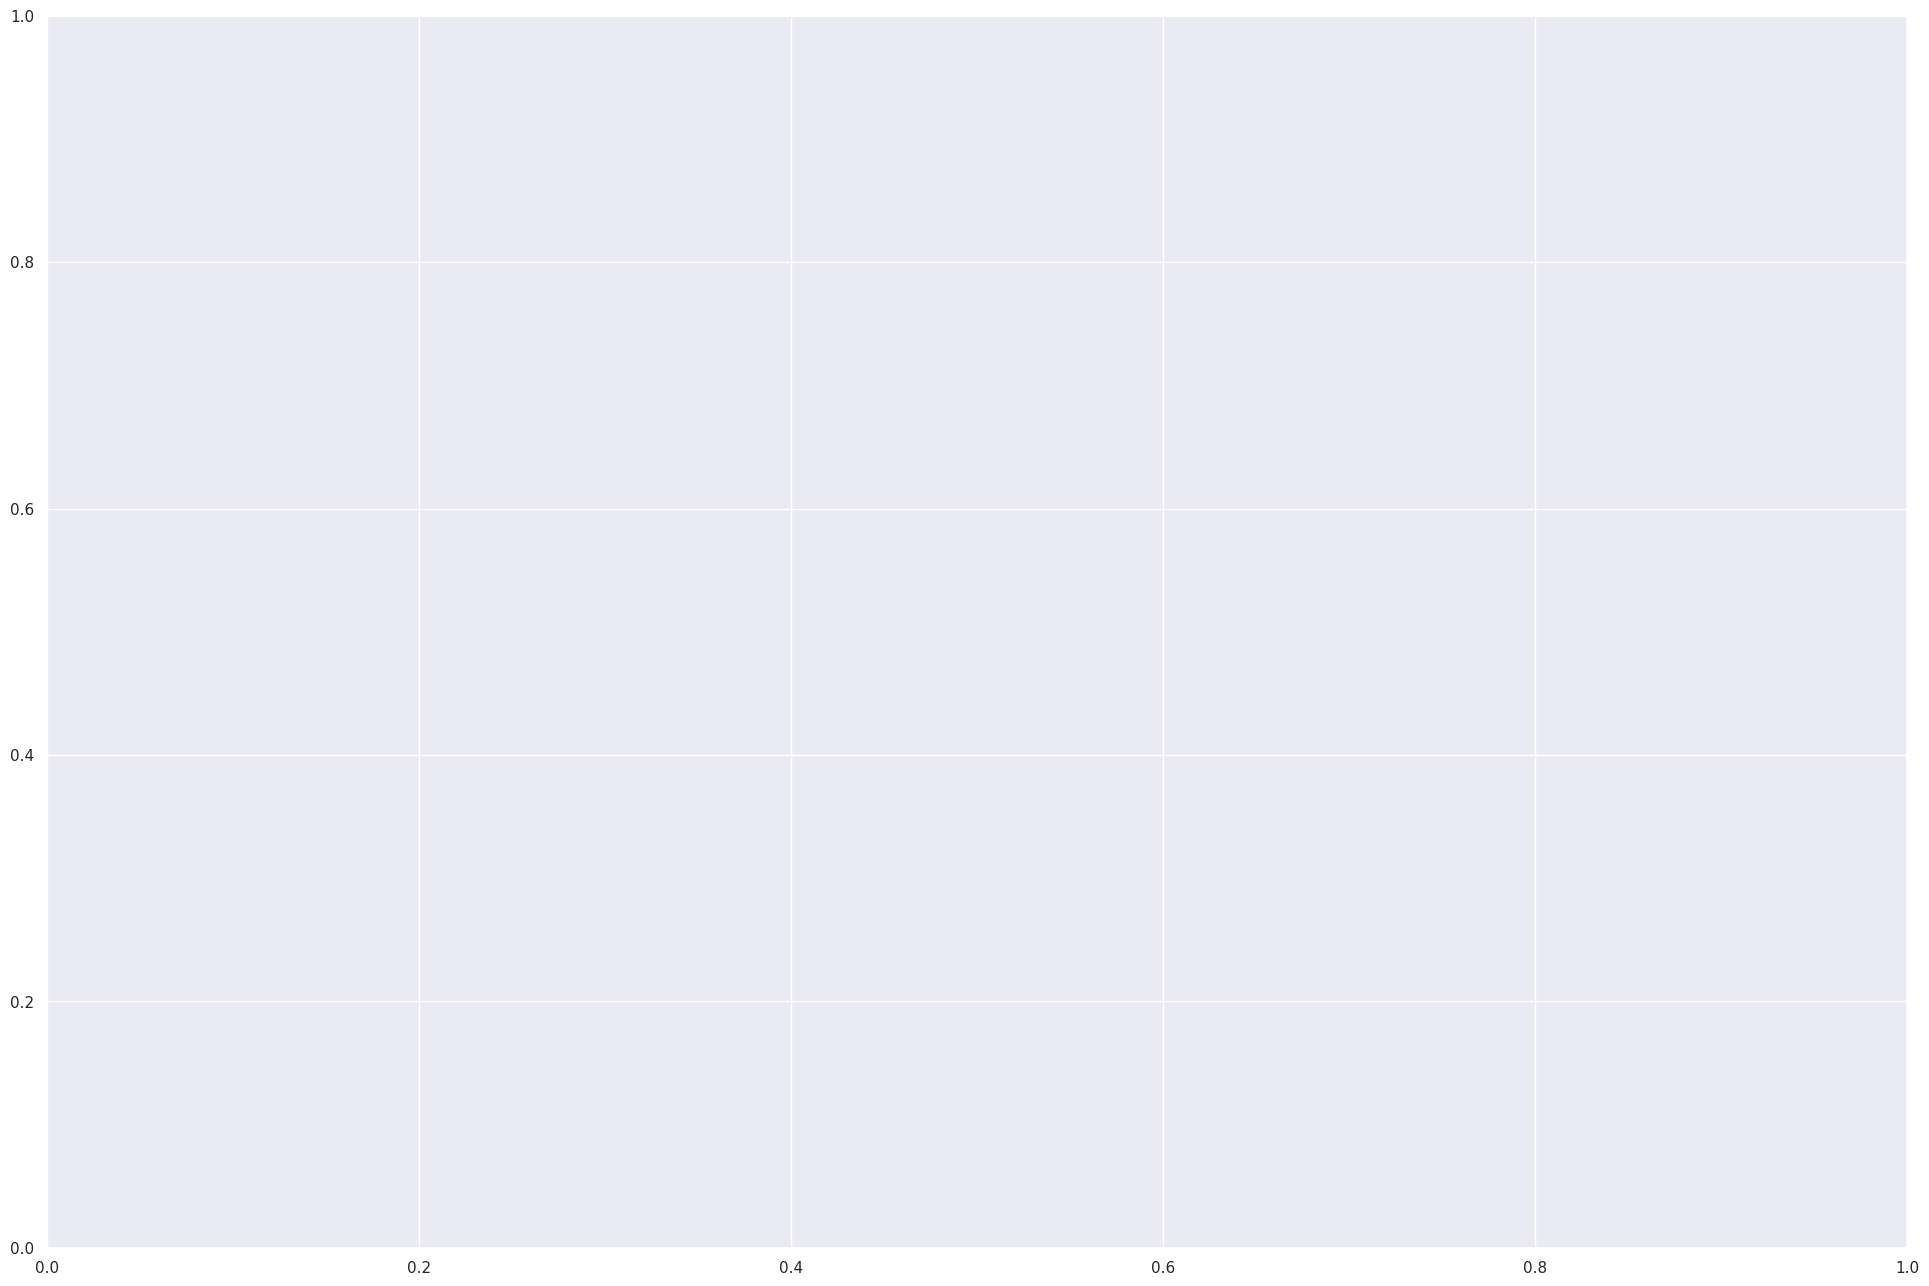

In [20]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Filter data untuk bulan Tertentu
datacuaca_month = datacuaca[(datacuaca['timestamp']
.dt.year == pilih_tahun) & (datacuaca['timestamp']
.dt.month == pilih_bulan)]

# Mengurutkan data berdasarkan 'timestamp'
datacuaca_month = datacuaca_month.sort_values(by='timestamp')

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca_month.groupby(['day', 'hour']).agg({'temperature': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
temperature_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='temperature')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(temperature_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="coolwarm")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap
plt.savefig("Temp_month" + "_" + str(pilih_tahun) + "_" + str(pilih_bulan) + ".jpg")
plt.show()



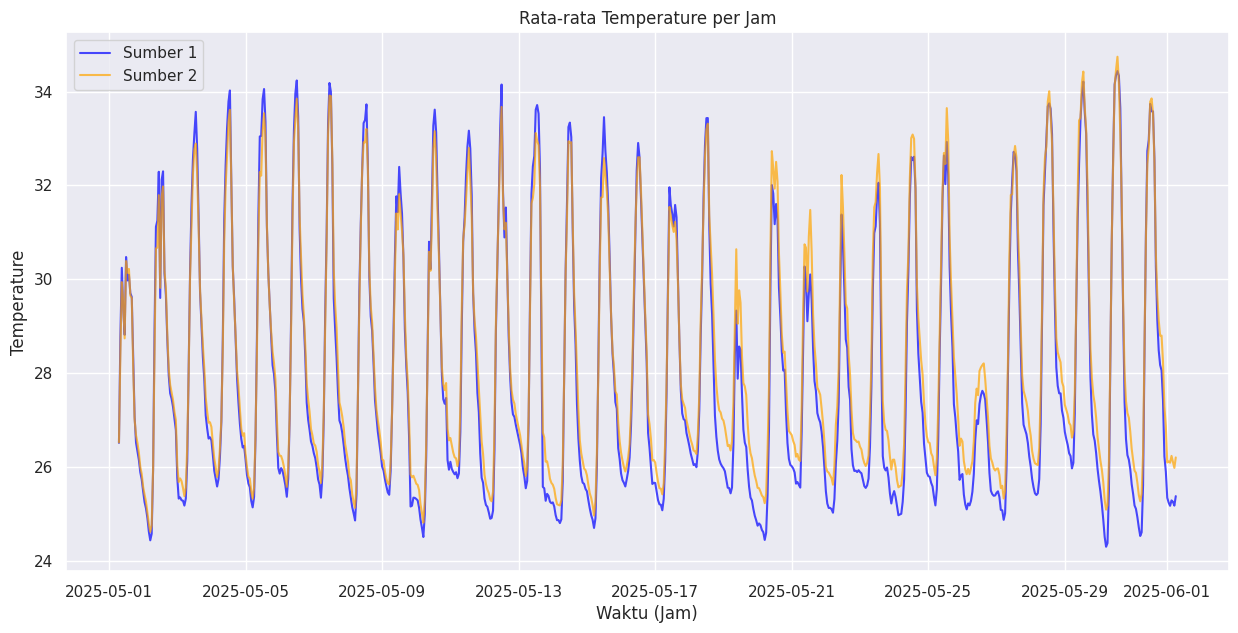

In [49]:
# Variabel pengganti untuk menentukan kolom yang akan digunakan
column_to_plot = 'temperature'  # Ubah ke 'humidity' atau 'pressure' sesuai kebutuhan

# Mengelompokkan data berdasarkan jam dan menghitung rata-rata
datacuaca['hour'] = datacuaca['timestamp'].dt.floor('h')  # Membulatkan ke jam terdekat
datacuaca2['hour'] = datacuaca2['timestamp'].dt.floor('h')

# Menghitung rata-rata per jam untuk kolom yang dipilih
datacuaca_hourly = datacuaca.groupby('hour')[column_to_plot].mean().reset_index()
datacuaca2_hourly = datacuaca2.groupby('hour')[column_to_plot].mean().reset_index()

# Plot data dari kedua DataFrame
plt.figure(figsize=(15, 7))

# Plot data dari datacuaca
plt.plot(datacuaca_hourly['hour'], datacuaca_hourly[column_to_plot], label='Sumber 1', color='blue', alpha=0.7)

# Plot data dari datacuaca2
plt.plot(datacuaca2_hourly['hour'], datacuaca2_hourly[column_to_plot], label='Sumber 2', color='orange', alpha=0.7)

# Menambahkan label, judul, dan legenda
plt.xlabel('Waktu (Jam)')
plt.ylabel(f'{column_to_plot.capitalize()}')
plt.title(f'Rata-rata {column_to_plot.capitalize()} per Jam')
plt.legend()
plt.grid(True)

# Menampilkan plot
plt.show()

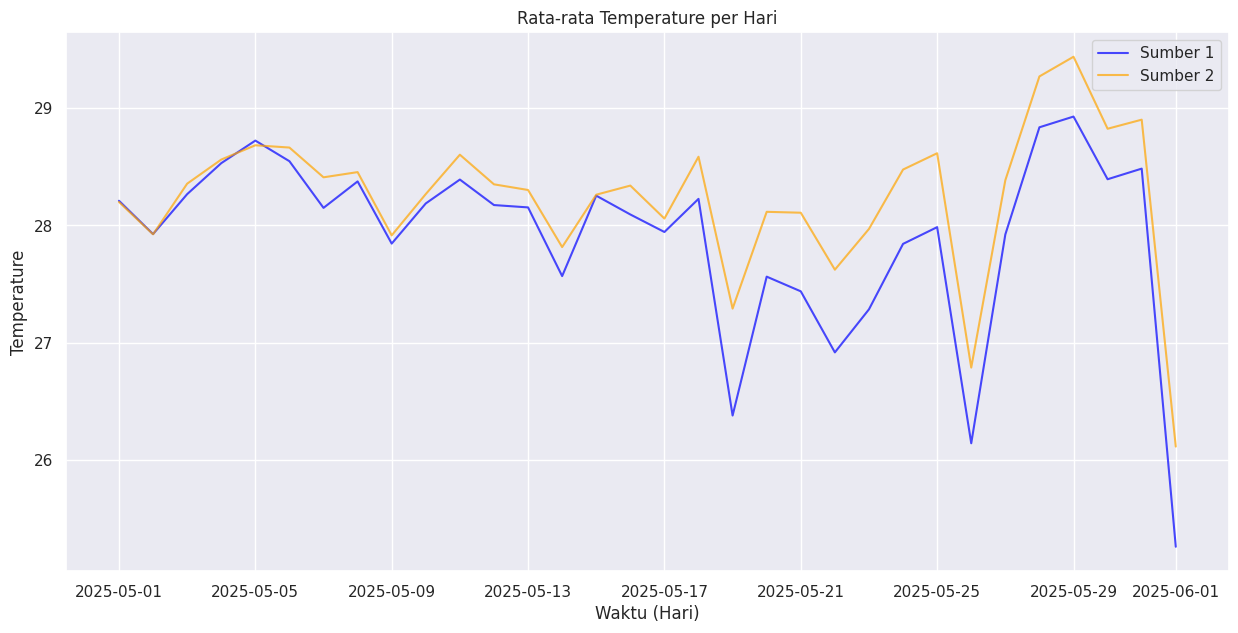

In [50]:
import matplotlib.pyplot as plt

# Variabel pengganti untuk menentukan kolom yang akan digunakan
column_to_plot = 'temperature'  # Ubah ke 'humidity' atau 'pressure' sesuai kebutuhan

# Mengelompokkan data berdasarkan hari dan menghitung rata-rata untuk kolom yang dipilih
datacuaca['day'] = datacuaca['timestamp'].dt.floor('d')  # Membulatkan ke hari terdekat
datacuaca2['day'] = datacuaca2['timestamp'].dt.floor('d')

# Menghitung rata-rata per hari untuk kolom yang dipilih
datacuaca_daily = datacuaca.groupby('day')[column_to_plot].mean().reset_index()
datacuaca2_daily = datacuaca2.groupby('day')[column_to_plot].mean().reset_index()

# Plot data dari kedua DataFrame
plt.figure(figsize=(15, 7))

# Plot data dari datacuaca
plt.plot(datacuaca_daily['day'], datacuaca_daily[column_to_plot], label='Sumber 1', color='blue', alpha=0.7)

# Plot data dari datacuaca2
plt.plot(datacuaca2_daily['day'], datacuaca2_daily[column_to_plot], label='Sumber 2', color='orange', alpha=0.7)

# Menambahkan label, judul, dan legenda
plt.xlabel('Waktu (Hari)')
plt.ylabel(f'{column_to_plot.capitalize()}')
plt.title(f'Rata-rata {column_to_plot.capitalize()} per Hari')
plt.legend()
plt.grid(True)

# Menampilkan plot
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=672c3bf7-b636-46e8-b7c0-4f6feec29313' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>